In [1]:
import os

import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [38]:
base_dir = "/Users/szhan/Projects/tsimpute/analysis/genealogy_only/"

in_prefix = "ten_yri_ceu_t0_p10"

num_reps = 100
metric = "iqs"

max_maf = 0.50

out_file = in_prefix + "." + metric + ".png"
#out_file = in_prefix + "_zoom" + ".iqs.png"

In [39]:
results = None
scores = []

for i in np.arange(1, num_reps + 1):
    # i1.csv_1.csv
    in_file = base_dir + in_prefix + "/"
    in_file += "i" + str(i) + ".csv" + "_" + str(i) + ".csv"
    
    if os.path.exists(in_file):
        df = pd.read_csv(in_file, skiprows=20)
        df = df[["maf", metric]].dropna(axis=0)
        scores.append(np.mean(df[metric]))
        results = df if results is None else pd.concat([results, df])
    else:
        print(f"Not found {in_file}")

In [18]:
values = np.vstack([results["maf"], results[metric]])
kernel = stats.gaussian_kde(values)
x = kernel(np.vstack([results["maf"], results[metric]]))

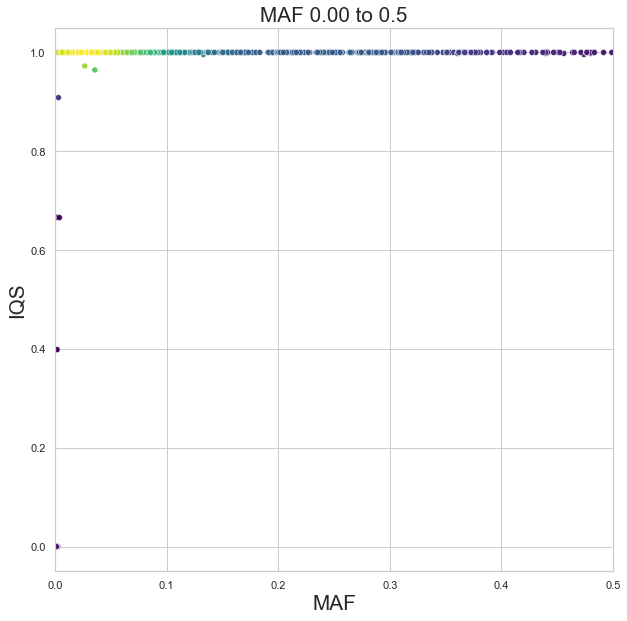

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title(
    f"MAF 0.00 to {max_maf}",
    size="xx-large"
)

ax.set_xlim([0, max_maf])

ax.set_ylabel(metric.upper(), size="xx-large")
ax.set_xlabel("MAF", size="xx-large")

g = sns.scatterplot(
    y=metric,
    x="maf",
    data=results,
    c=x,
    cmap="viridis",
    x_jitter=True,
    ax=ax
);

g.get_figure().savefig(out_file)